# Results for paper: TITLE

This notebook contains the script used to create results for *link*

## Cyclohexane

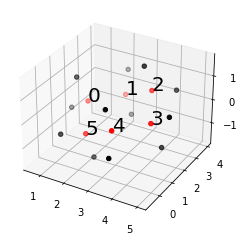

In [12]:
# The carbon atoms are arranged in the correct order to move along the ring.
cyclohexane_xyz = """
C      1.367908000      1.836044000     -0.049671000
C      2.329589000      3.011988000     -0.044238000
C      3.630888000      2.632672000      0.661249000
C      4.247092000      1.383956000      0.049671000
C      3.285411000      0.208012000      0.044238000
C      1.984112000      0.587328000     -0.661249000
H      2.524936000      3.113740000     -0.900292000
H      1.933922000      3.936128000      0.506802000
H      3.388552000      2.469096000      1.674854000
H      4.348450000      3.220000000      0.605369000
H      1.030575000      1.607424000      0.972471000
H      0.592407000      1.921052000     -0.581309000
H      4.584425000      1.612576000     -0.972471000
H      5.022593000      1.298948000      0.581309000
H      2.226448000      0.750904000     -1.674854000
H      1.266550000     -0.000000000     -0.605369000
H      3.090064000      0.106260000      0.900292000
H      3.681078000     -0.716128000     -0.506802000
"""

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import interactive
interactive(True)

# Uncomment to get an interactive plot 
# %matplotlib qt

x,y,z = [],[],[]
carbons = 6
cyclohexane = cyclohexane_xyz.split('\n')[1:-1]
for line in cyclohexane:
    items = line.split("     ")
    x.append(float(items[1]))
    y.append(float(items[2]))
    z.append(float(items[3]))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x[:6], y[:6], z[:6], c="red")
ax.scatter(x[6:], y[6:], z[6:], c="black")
for i in range(carbons):
    ax.text(x[i],y[i],z[i], '%s' %(str(i)), size=20, zorder=1, color='k')
plt.show()

In [13]:
# from nbed.mol_plot import draw_molecule

# mol_view = draw_molecule(cyclohexane,
#               width=400,
#                height=400,
#               jupyter_notebook=True)
# mol_view.show()

# Cyclohexane

## Reference Values 

In [14]:
from pyscf import scf, cc, fci, gto

# print("Whole system DFT")
# ks = scf.RKS(molecule)
# ks.conv_tol = config["convergence"]
# ks.xc = config["xc_functional"]
# whole_dft = ks.kernel()
# print("")

geometr = "./molecular_structures/water.xyz"
mol = gto.Mole(atom=geometr, basis='sto-3g')

print("Hartree Fock")
hf = scf.RHF(mol)
hf.conv_tol = 1e-8
hf_energy = hf.kernel()
print("")

print('FCI')
fci = fci.FCI(hf)
hf.conv_tol = 1e-8
fci_energy = fci.kernel()
print(fci_energy[0])

# print("CCSD")
# ccsd = cc.CCSD(hf)
# ccsd.conv_tol = config["convergence"]
# whole_ccsd, *_ = ccsd.kernel()
# whole_ccsd += hf_energy

Hartree Fock
converged SCF energy = -74.96444758277


Initialize <pyscf.gto.mole.Mole object at 0x7f182fabf710> in <pyscf.scf.hf.RHF object at 0x7f1843b5a310>



FCI
-75.01553018949157


In [ ]:
HC({"IIII":0.5, "IIXI":0.25, "IIXI":0.25, "IIIY":0.2, "IZII":0.2, "IXII":0.2, "XIII":0.5})

In [5]:
from nbed.utils import save_ordered_xyz_file, pubchem_mol_geometry
from pathlib import Path

def find_and_save(mol_name):

    if Path(f'./molecular_structures/{mol_name}.xyz').exists():
        print(f'xyz file for {mol_name} already exists.\n')
        return

    geo_dict = pubchem_mol_geometry(mol_name)
    print('Molecule geometry:')
    print(geo_dict)
    save_ordered_xyz_file(mol_name, geo_dict, [0])
    print(f'xyz file for {mol_name} created.\n')

In [1]:
from openfermion import get_sparse_operator
from scipy.sparse.linalg import eigsh
from pathlib import Path
from nbed.utils import save_ordered_xyz_file, pubchem_mol_geometry

def ground(hamiltonian):
    sparse_ham = get_sparse_operator(hamiltonian)
    eigenvalue, _ = eigsh(sparse_ham, k=1, which='SA')
    return eigenvalue[0]


def find_and_save(mol_name):
    if Path(f'./molecular_structures/{mol_name}.xyz').exists():
        print(f'xyz file for {mol_name} already exists.\n')
        return

    geo_dict = pubchem_mol_geometry(mol_name)
    print('Molecule geometry:')
    print(geo_dict)
    save_ordered_xyz_file(mol_name, geo_dict, [0])
    print(f'xyz file for {mol_name} created.\n')

def print_results(result):
    print(f"Qubits\t\t{result['mu']['n_qubits']}/{result['huz']['n_qubits']}/{result['full']['n_qubits']}")
    print(f"Terms\t\t{result['mu']['terms']}/{result['huz']['terms']}/{result['full']['terms']}")
    print(f'DFT:\t\t{result["e_dft"]}')
    #print(f"CCSD Emb:\t{result['mu']['e_ccsd']}/{result['huz']['e_ccsd']}")
    print(f"Exact Emb:\t{result['mu']['ground']}/{result['huz']['ground']}")

    if result['full']['fci'] is not None:
        print(f"FCI:\t\t{result['full']['e_fci']}")
    else:
        print(f"CCSD:\t\t{result['full']['e_ccsd']}")

/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/site-packages/

find_and_save('femo)

In [25]:
find_and_save('glucose')

Molecule geometry:
{0: ('O', (-0.6679, 1.1587, 0.257)), 1: ('O', (-0.887, -2.4483, -0.3388)), 2: ('O', (1.8623, -2.0693, 0.4696)), 3: ('O', (2.8609, 0.5414, -0.4619)), 4: ('O', (1.1222, 2.6552, 0.2574)), 5: ('O', (-3.3742, 0.9717, -0.1865)), 6: ('C', (-0.3727, -1.247, 0.23)), 7: ('C', (1.0856, -1.0709, -0.194)), 8: ('C', (-1.2211, -0.0621, -0.2375)), 9: ('C', (1.6082, 0.3151, 0.1839)), 10: ('C', (0.6388, 1.4132, -0.2534)), 11: ('C', (-2.655, -0.1577, 0.274)), 12: ('H', (-0.4248, -1.3522, 1.3206)), 13: ('H', (1.2066, -1.2487, -1.2697)), 14: ('H', (-1.2548, -0.0098, -1.3343)), 15: ('H', (1.7952, 0.3598, 1.2636)), 16: ('H', (0.5967, 1.5141, -1.344)), 17: ('H', (-2.6916, -0.1535, 1.3685)), 18: ('H', (-3.1564, -1.0581, -0.0922)), 19: ('H', (-0.8514, -2.3615, -1.3066)), 20: ('H', (1.4973, -2.9356, 0.22)), 21: ('H', (2.7165, 0.4989, -1.4227)), 22: ('H', (1.4876, 2.5033, 1.1448)), 23: ('H', (-2.9192, 1.7652, 0.144))}
xyz file for glucose created.



In [27]:
from pathlib import Path
from pyscf.gto import Mole
import nbed
from nbed.driver import NbedDriver
from nbed.ham_builder import HamiltonianBuilder
from nbed.ham_converter import HamiltonianConverter
from openfermion import count_qubits
import json
from pyscf import cc

localisation = ['spade','mullikan','boys','ipo']

# Need to build paths to xyz files.
max_atoms = 3

def get_results(mol_name, n_active_atoms, localisation='pipek-mezey', qubits=None):
    find_and_save(mol_name)
    geometry = f'./molecular_structures/{mol_name}.xyz'

    if Path(geometry).exists():
        assert input("Do you want to overwrite the saved data for %s", mol_name)

    result = {}
    # We pass these to the driver.
    result['n_active_atoms']=n_active_atoms
    result['localization']=localisation
    result['basis']='sto-3g'
    result['xc_functional']='b3lyp'
    result['convergence']=1e-6
    result['savefile']=None
    result['charge']=0
    result['mu_level_shift']=1e6
    result['run_ccsd_emb']=False
    result['run_fci_emb']=False
    result['max_ram_memory']=8_000
    result['pyscf_print_level']=1

    driver = NbedDriver(geometry=geometry, projector='both', **result)
    print("Driver finised.")
    result['e_dft'] = driver._global_rks.e_tot

    # These are important but not used in the driver.
    result['mol_name']=mol_name
    result['transform']='jordan_wigner'
    result['qubits'] = qubits

    # Mu shift result
    mu_builder = HamiltonianBuilder(driver._mu['scf'], driver._mu['classical_energy'], transform=result['transform'])
    qham = mu_builder.build(qubits, taper=False)
    result['mu'] = {}
    result['mu']['qham'] = HamiltonianConverter(qham)._intermediate
    result['mu']['terms'] = len(qham.terms)
    result['mu']['n_qubits'] = count_qubits(qham)
    result['mu']['classical_energy'] = driver._mu['classical_energy']
    #result['mu']['e_ccsd'] = driver._mu['e_ccsd']
    result['mu']['ground'] = ground(qham)

    # Huzinaga result
    huz_builder = HamiltonianBuilder(driver._huzinaga['scf'], driver._huzinaga['classical_energy'], transform=result['transform'])
    qham = huz_builder.build(qubits, taper=False)
    result['huz'] = {}
    result['huz']['qham'] = HamiltonianConverter(qham)._intermediate
    result['huz']['terms'] = len(qham.terms)
    result['huz']['n_qubits'] = count_qubits(qham)
    result['huz']['classical_energy'] = driver._huzinaga['classical_energy']
    # result['huz']['e_ccsd'] = driver._huzinaga['e_ccsd']
    result['huz']['ground'] = ground(qham)

    full_builder = HamiltonianBuilder(driver._global_hf, transform=result['transform'])
    full_ham = full_builder.build(qubits, taper=False)
    result['full'] = {}
    result['full']['terms'] = len(full_ham.terms)
    result['full']['n_qubits'] = count_qubits(full_ham)
    result['full']['qham'] = HamiltonianConverter(full_ham)._intermediate

    # untapered_mu = mu_builder.build(taper=False)
    # untapered_huz = huz_builder.build(taper=False)
    # untapered_full = full_builder.build(taper=False)
    # print(f"Ground diff with tapering {result['mu']['ground']-ground(untapered_mu)}/{result['huz']['ground']-ground(untapered_huz)}")
    # print(f"Untapered Qubits {count_qubits(untapered_mu)}/{count_qubits(untapered_huz)}/{count_qubits(untapered_full)}")
    # print(f"Untapered Terms {len(untapered_mu.terms)}/{len(untapered_huz.terms)}/{len(untapered_full.terms)}")

    if result['full']['n_qubits'] < 16:
        result['full']['ground'] = ground(full_ham)
        result['full']['e_fci'] = driver._global_fci.e_tot
        result['full']['e_ccsd'] = None
    else:
        # Whole system CCSD Eneergy
        result['full']['ground'] = None

        ccsd = cc.CCSD(driver._global_hf)
        ccsd.conv_tol = result["convergence"]
        whole_ccsd, *_ = ccsd.kernel()
        whole_ccsd += driver._global_hf.e_tot

        result['full']['e_fci']  = None
        result['full']['e_ccsd'] = whole_ccsd

    print_results(result)
    
    savefile = f'../data/{mol_name}_{n_active_atoms}_{localisation}.json'
    with open(savefile, 'w') as f:
        json.dump(result, f, indent=4)
        print(f'{savefile} created.')

    return result


In [28]:
get_results('glucose', 3, taper=False)

xyz file for glucose already exists.



In [20]:
result = get_results("water", 1, localisation='spade', taper=True)


xyz file for water already exists.

E(CCSD) = -75.01540889844514  E_corr = -0.05096131567517674
Qubits		10/10/11
Terms		1572/1572/1455
DFT:		-75.27815045263162
CCSD Emb:	-75.06274483391849/-75.0627444446012
Exact Emb:	-75.04506120638443/-75.04506142818616
CCSD:		-75.01540889844514


In [16]:
print_results(result)

Qubits		5/7/26
Terms		62/349/15364
DFT:		-185.8976369388924
CCSD Emb:	-185.89089352797282/-185.89084035955764
Exact Emb:	-185.89079620624506/-185.89084035328216
CCSD:		-185.26927798009262


In [26]:
ground(HamiltonianConverter(tap_result['mu']['qham']).openfermion)

array([-185.89079621])

In [27]:
result = get_results("carbon dioxide", 1, localisation='spade', taper=False)
ground(HamiltonianConverter(result['mu']['qham']).openfermion)

xyz file for carbon dioxide already exists.

E(CCSD) = -185.2692779758276  E_corr = -0.2012468993036446
Qubits 10/10/30
Terms 156/444/16170
DFT Energy: -185.8976369388924
Mu CCSD Embedding energy -185.89089352797316
Huz CCSD Embedding energy -185.89084035955761
CCSD Energy -185.26927797582763


In [ ]:
result = get_results("water", 1)
ground(result['mu']['qham'])

xyz file for water already exists.



KeyboardInterrupt: 

In [41]:
import json
from nbed.ham_converter import HamiltonianConverter

mol_name = 'cyclopropane'
n_active_atoms = 3
filepath=f'../data/{mol_name}_{n_active_atoms}_pipek-mezey.json'
with open(filepath, 'r') as f:
    data = json.load(f)

print_results(data)

# if count_qubits(mu_qham) < 18:
#     mu_qham = HamiltonianConverter(data['mu']['qham']).openfermion
#     huz_qham = HamiltonianConverter(data['huz']['qham']).openfermion
#     print("Diagonalized Ground States.")
#     print(f"Mu\tEnergy: {ground(mu_qham)}")
#     print(f"Huz\tEnergy: {ground(huz_qham)}")
# if count_qubits(full_qham) < 18:
#     full_qham = HamiltonianConverter(data['full_qham']).openfermion
#     print(f"Full\tEnergy: {ground(full_qham)}")

Qubits 30/30/42
Terms 71656/71646/273428
DFT Energy: -116.3862229151956
Mu CCSD Embedding energy -116.12221411102641
Huz CCSD Embedding energy -116.12221389527812
CCSD Energy -115.87260806983275


Cycle through molecules to output the desired info.

In [9]:
from pyscf import scf, cc, gto

molecule = gto.Mole(atom=geometry, charge=0).build()

print("Whole system DFT")
ks = scf.RKS(molecule)
ks.conv_tol = convergence
ks.xc = xc_functional
whole_dft = ks.kernel()
print("")

print("Hartree Fock")
hf = scf.RHF(molecule)
hf.conv_tol = convergence
hf_energy = hf.kernel()
print("")

print("CCSD")
ccsd = cc.CCSD(hf)
ccsd.conv_tol = convergence
whole_ccsd, *_ = ccsd.kernel()
whole_ccsd += hf_energy

Whole system DFT
converged SCF energy = -116.386569879701

Hartree Fock
converged SCF energy = -115.66607486168

CCSD
E(CCSD) = -115.8731272952766  E_corr = -0.2070524335969255


In [10]:
from openfermion import eigenspectrum
from openfermion import count_qubits

active_atoms = [i for i in range(0,4)]
#energies = [eigenspectrum(qham)[0] for qham in qhams.values()]
#n_qubits = [count_qubits(qham) for qham in qhams.values()]

energies = [whole_dft] + [eigenspectrum(qham)[0] for qham in qhams.values()]
n_qubits = [0] + [count_qubits(qham) for qham in qhams.values()]


TypeError: Failed to convert a dict to a sparse matrix.

Read cyclopropane data

In [75]:
cp_data = []
for filepath in Path(f'../data/').iterdir():
    if 'cyclopropane' in filepath.stem: 
        with open(filepath, 'r') as f:
            data = json.load(f)
        
        cp_data.append(data)
cp_data.reverse()

whole_ccsd = cp_data[0]['full']['e_ccsd']
whole_dft = cp_data[0]['e_dft']
active_atoms = range(0,4)
full_n_qubits = cp_data[0]['full']['n_qubits']
full_terms = cp_data[0]['full']['terms']
energies = [whole_dft] + [res['huz']['e_ccsd'] for res in cp_data]
n_qubits = [0] + [res['huz']['n_qubits'] for res in cp_data]
terms = [0] + [res['huz']['terms'] for res in cp_data]

In [67]:
full_n_qubits

42

/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


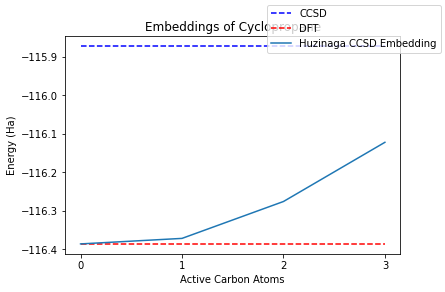

In [76]:
fig, ax = plt.subplots()
ax.hlines(whole_ccsd, min(active_atoms), max(active_atoms), colors='blue', linestyle='dashed', label='CCSD')
ax.hlines(whole_dft, min(active_atoms), max(active_atoms), colors='red', linestyle='dashed', label='DFT')
ax.plot(active_atoms, energies, label='Huzinaga CCSD Embedding')
ax.set_xlabel('Active Carbon Atoms')
ax.set_ylabel('Energy (Ha)')
ax.set_xticks(active_atoms)
ax.set_title('Embeddings of Cyclopropane')
fig.legend()
fig.show()

/home/mwilliams/anaconda3/envs/nbed/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


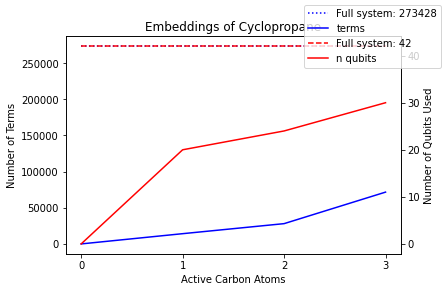

In [77]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.set_ylabel('Number of Qubits Used')
ax2.hlines(full_n_qubits, min(active_atoms), max(active_atoms), colors='red', linestyle='dashed', label=f'Full system: {full_n_qubits}')
ax2.plot(active_atoms, n_qubits, linestyle='solid', color='red', label='n qubits')
ax.hlines(full_terms, min(active_atoms), max(active_atoms), colors='blue', linestyle='dotted', label=f'Full system: {full_terms}')
ax.plot(active_atoms, terms, linestyle='solid', color='blue', label='terms')
ax.set_xlabel('Active Carbon Atoms')
ax.set_xticks(active_atoms)
ax.set_ylabel('Number of Terms')
ax.set_title('Embeddings of Cyclopropane')
fig.legend()
fig.show()

## General Params 
threshold
basis
xc functional


## Small molecules

One for SPADE
One for IBO
Molecule, active atoms(AOs), dft energy, embedding (huz/mu), fci/ccsd, mu: qubits(terms), huz: qubits(terms), full:qubits(terms)


Graphs:
Bar graph of molecules energies, hamiltonian size
Cyclic molecule: terms / qubits, energy
bonus: compare molecular orbitals


## H4
One for different numbers of active atoms 1-3
Angle, dft energy, embedding (huz/mu), full_system: fci/ccsd, mu: qubits(terms), huz: qubits(terms), full:qubits(terms)

## Water
Bond length, dft energy, embedding (huz/mu), fci/ccsd, mu: qubits(terms), huz: qubits(terms), full:qubits(terms)